In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tag=pd.read_csv("TAG.csv")
tsgene=pd.read_csv("TSGENE.csv")

In [3]:
df=pd.read_csv("COSMIC.csv")
dfc=df.copy()
dfc['CANCER']=dfc['CANCER'].map({'carcinoma':0,'haematopoietic_neoplasm':1,'glioma':2,'NS':3,'primitive_neuroectodermal_tumour-medulloblastoma':4,'lymphoid_neoplasm':5})
dfc['ORGAN']=dfc['ORGAN'].map({'pancreas':0,'large_intestine':1,'ovary':2,'lung':3,'breast':4,'endometrium':5,'haematopoietic_and_lymphoid_tissue':6,'kidney':7,'central_nervous_system':8,'urinary_tract':9,'liver':10,'cervix':11,'NS':12})

In [4]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

#split dataset in features and target variable
feature_cols = ['ORGAN', 'START', 'END']
X = dfc[feature_cols] # Features
y = dfc['CANCER'] # Target variable
    
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 80% training and 20% test
    
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
    
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

print("!!Enter Values to determine cancer type !!")
b=int(input("Enter Start Coordinate: "))
c=int(input("Enter End Coordinate: "))
print("\n\nFor pancreas enter 0\nFor large_intestine enter 1\nFor ovary enter 2\nFor breast enter 3\nFor endometrium enter 4\nFor haematopoietic_and_lymphoid_tissue enter 5")
print("For kidney enter 6\nFor central_nervous_system enter 7\nFor urinary_trac enter 8\nFor liver enter 9\nFor cervix enter 10\nFor NS enter 11")
a=int(input("Enter organ: "))
q=clf.predict([[a,b,c]])
print(q)
if q==0:
    print('Cancer Type is carcinoma!!')
elif q==1:
    print('Cancer Type is haematopoietic_neoplasm!!')
elif q==2:
    print('Cancer Type is glioma!!')
elif q==3:
    print('Cancer Type is NS!!')
elif q==4:
    print('Cancer Type is primitive_neuroectodermal_tumour-medulloblastoma!!')
elif q==5:
    print('Cancer Type is lymphoid_neoplasm!!')
else:
    print('Cancer Type is Unable to predict!!')

Accuracy: 99.70244907301442
!!Enter Values to determine cancer type !!
Enter Start Coordinate: 1
Enter End Coordinate: 122


For pancreas enter 0
For large_intestine enter 1
For ovary enter 2
For breast enter 3
For endometrium enter 4
For haematopoietic_and_lymphoid_tissue enter 5
For kidney enter 6
For central_nervous_system enter 7
For urinary_trac enter 8
For liver enter 9
For cervix enter 10
For NS enter 11
Enter organ: 4
[0]
Cancer Type is carcinoma!!


In [5]:
tsgene.head()

,CNO,START,END,CYTOBAND,GSYM,GENE_ALIAS,Unnamed: 6,GENE_NAME,GENE_TYPE,GPATTERN
0,20,54400000,62435964,20q13.3,CDH4,CAD4|RCAD,HGNC:1763|MIM:603006|Ensembl:ENSG00000179242|H...,"cadherin 4, type 1, R-cadherin (retinal)",protein-coding,"R-CAD|R-cadherin|cadherin 4, type 1, prepropro..."
1,3,44700000,51400000,3p21.31,MIR1226,MIRN1226|hsa-mir-1226,HGNC:33922|miRBase:MI0006313,microRNA 1226,miscRNA,-
2,11,0,2800000,11p15.5,TSPAN32,ART1|PHEMX|PHMX|TSSC6,HGNC:13410|MIM:603853|Ensembl:ENSG00000064201|...,tetraspanin 32,protein-coding,pan-hematopoietic expression protein|protein P...
3,11,0,2800000,11p15.5,TSSC4,-,HGNC:12386|MIM:603852|Ensembl:ENSG00000184281|...,tumor suppressing subtransferable candidate 4,protein-coding,protein TSSC4|tumor-suppressing STF cDNA 4 pro...
4,16,56700000,65200000,16q21,CDH11,CAD11|CDHOB|OB|OSF-4,HGNC:1750|MIM:600023|Ensembl:ENSG00000140937|H...,"cadherin 11, type 2, OB-cadherin (osteoblast)",protein-coding,cadherin-11


In [6]:
tsgene.describe()

,CNO,START,END
count,694.000000,6.940000e+02,6.940000e+02
mean,9.720461,6.871758e+07,7.659491e+07
std,6.130586,5.574348e+07,5.622833e+07
min,1.000000,0.000000e+00,2.200000e+06
25%,4.000000,2.350000e+07,3.110000e+07
50%,9.000000,5.200000e+07,6.090000e+07
75%,15.000000,1.067250e+08,1.139000e+08
max,22.000000,2.417000e+08,2.472497e+08


In [7]:
tsgene['GENE_TYPE'].value_counts()

protein-coding    620
miscRNA            74
Name: GENE_TYPE, dtype: int64

In [8]:
df = tsgene['GENE_TYPE'] 
# create dummy variables
new=pd.get_dummies(df)
new

,miscRNA,protein-coding
0,0,1
1,1,0
2,0,1
3,0,1
4,0,1
...,...,...
689,0,1
690,0,1
691,1,0
692,0,1


In [9]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

#split dataset in features and target variable
feature_cols = ['CNO', 'START', 'END']
X = tsgene[feature_cols] # Features
y = new['miscRNA'] # Target variable
    
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 80% training and 20% test
    
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
    
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

print("!!Enter Values to determine Gene Type!!")
a=int(input("Enter Chromosome Number: "))
b=int(input("Enter Start Coordinate: "))
c=int(input("Enter End Coordinate: "))
q=clf.predict([[a,b,c]])
print(q)
if q==1:
    print('Gene Type is miscRNA!!')
else:
    print('Gene Type is protein-coding!!')

Accuracy: 88.48920863309353
!!Enter Values to determine Gene Type!!
Enter Chromosome Number: 1
Enter Start Coordinate: 2
Enter End Coordinate: 33
[0]
Gene Type is protein-coding!!


In [10]:
tag.head()

,CNO,START,END,CYTOBAND,GSYM,GTYPE,DISEASE
0,1,0,2300000,1p36.33,SKI,Oncogene,V-Ski Avian Sarcoma Viral Oncogene Homolog
1,1,7100000,9200000,1p36.23,PARK7,Oncogene,Parkinson Protein 7
2,1,7100000,27800000,1p36.2-p36.1,FGR,Oncogene,Feline Gardner-Rasheed Sarcoma Viral Oncogene ...
3,1,7100000,16100000,1p36.2,ENO1,--,enolase 1
4,1,16100000,20300000,1p36.13,AKR7A2,Other,Aldo-Keto Reductase Family 7


In [11]:
tag['GTYPE'].value_counts()

Tumor suppressor gene                 232
Oncogene                              218
--                                    150
Other                                 142
& -- & Oncogene                         9
& -- & Tumor suppressor gene            6
& Oncogene & Tumor suppressor gene      3
& Tumor suppressor gene & --            3
& -- & Other                            2
& -- & oncogene                         1
& Other & Tumor suppressor gene         1
& Oncogene & --                         1
Name: GTYPE, dtype: int64

In [12]:
df = tag['GTYPE'] 
# create dummy variables
new=pd.get_dummies(df)
new

,& -- & Oncogene,& -- & Other,& -- & Tumor suppressor gene,& -- & oncogene,& Oncogene & --,& Oncogene & Tumor suppressor gene,& Other & Tumor suppressor gene,& Tumor suppressor gene & --,--,Oncogene,Other,Tumor suppressor gene
0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
763,0,0,0,0,0,0,0,0,0,1,0,0
764,0,0,0,0,0,0,0,0,0,0,1,0
765,0,0,0,0,0,0,0,0,0,0,0,1
766,0,0,0,0,0,0,0,0,0,0,0,1


In [13]:
print('Press 1 to check for Oncogene and 2 for Tumor Suppressor gene')
check=int(input())

# Load libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression # Import Logistic Regression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split # Import train_test_split function

#split dataset in features and target variable
if check==1:
    feature_cols = ['CNO', 'START', 'END']
    X = tag[feature_cols] # Features
    y = new['Oncogene'] # Target variable
    
    # Split dataset into training set and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 80% training and 20% test
    
    # Create Logistic Regressor object
    lreg = LogisticRegression()
    
    # Train Logistic Regression
    lreg = lreg.fit(X_train,y_train)

    #Predict the response for test dataset
    y_pred = lreg.predict(X_test)
    
    from sklearn.metrics import accuracy_score
    # calculating the accuracy score
    # Model Accuracy, how often is the classifier correct?
    print("Accuracy:",accuracy_score(y_test, y_pred)*100)
    
    a=int(input("Enter Chromosome Number: "))
    b=int(input("Enter Start Coordinate: "))
    c=int(input("Enter End Coordinate: "))
    q=lreg.predict([[a,b,c]])
    print(q)
    if q==1:
        print('Gene Type is Oncogene!!')
    else:
        print('Gene Type is not Oncogene!!')
    
elif check==2:
    feature_cols = ['CNO', 'START', 'END']
    X = tag[feature_cols] # Features
    y = new['Tumor suppressor gene'] # Target variable
    
    # Split dataset into training set and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 80% training and 20% test
    
    # Create Logistic Regressor object
    lreg = LogisticRegression()
    
    # Train Logistic Regression
    lreg = lreg.fit(X_train,y_train)

    #Predict the response for test dataset
    y_pred = lreg.predict(X_test)
    
    from sklearn.metrics import accuracy_score
    # calculating the accuracy score
    # Model Accuracy, how often is the classifier correct?
    print("Accuracy:",accuracy_score(y_test, y_pred)*100)
    
    a=int(input("Enter Chromosome Number: "))
    b=int(input("Enter Start Coordinate: "))
    c=int(input("Enter End Coordinate: "))
    q=lreg.predict([[a,b,c]])
    print(q)
    if q==1:
        print('Gene Type is Tumor suppressor gene!!')
    else:
        print('Gene Type is not Tumor suppressor gene!!')

else:
    print('Wrong Choice')

Press 1 to check for Oncogene and 2 for Tumor Suppressor gene
1
Accuracy: 74.67532467532467
Enter Chromosome Number: 3
Enter Start Coordinate: 32
Enter End Coordinate: 223
[0]
Gene Type is not Oncogene!!


In [14]:
df=pd.read_csv("COSMIC.csv")
df.head()

,CNO,START,END,ORGAN,CANCER,CANCER_TYPE
0,1,47851,727088,pancreas,carcinoma,NS
1,1,61735,2545650,ovary,carcinoma,serous_carcinoma
2,1,61735,4286684,ovary,carcinoma,serous_carcinoma
3,1,61735,8347361,large_intestine,carcinoma,adenocarcinoma
4,1,61735,121482979,large_intestine,carcinoma,adenocarcinoma


In [15]:
df['CANCER'].value_counts()

carcinoma                                           62920
haematopoietic_neoplasm                              1454
glioma                                                875
NS                                                    240
primitive_neuroectodermal_tumour-medulloblastoma       35
lymphoid_neoplasm                                      11
Name: CANCER, dtype: int64

In [16]:
dfc=df.copy()
dfc['CANCER']=dfc['CANCER'].map({'carcinoma':0,'haematopoietic_neoplasm':1,'glioma':2,'NS':3,'primitive_neuroectodermal_tumour-medulloblastoma':4,'lymphoid_neoplasm':5})
dfc

,CNO,START,END,ORGAN,CANCER,CANCER_TYPE
0,1,47851,727088,pancreas,0,NS
1,1,61735,2545650,ovary,0,serous_carcinoma
2,1,61735,4286684,ovary,0,serous_carcinoma
3,1,61735,8347361,large_intestine,0,adenocarcinoma
4,1,61735,121482979,large_intestine,0,adenocarcinoma
...,...,...,...,...,...,...
65530,24,22889018,28699018,pancreas,0,NS
65531,24,23241047,28699018,pancreas,0,NS
65532,24,23241047,28699018,pancreas,0,NS
65533,24,23984056,28699018,pancreas,0,NS


In [17]:
df['ORGAN'].value_counts()

pancreas                              28323
large_intestine                       10038
ovary                                  9162
lung                                   7597
breast                                 3083
endometrium                            2226
haematopoietic_and_lymphoid_tissue     1465
kidney                                 1193
central_nervous_system                  910
urinary_tract                           879
liver                                   256
cervix                                  236
NS                                      167
Name: ORGAN, dtype: int64

In [18]:
dfc['ORGAN']=dfc['ORGAN'].map({'pancreas':0,'large_intestine':1,'ovary':2,'lung':3,'breast':4,'endometrium':5,'haematopoietic_and_lymphoid_tissue':6,'kidney':7,'central_nervous_system':8,'urinary_tract':9,'liver':10,'cervix':11,'NS':12})

In [19]:
dfc

,CNO,START,END,ORGAN,CANCER,CANCER_TYPE
0,1,47851,727088,0,0,NS
1,1,61735,2545650,2,0,serous_carcinoma
2,1,61735,4286684,2,0,serous_carcinoma
3,1,61735,8347361,1,0,adenocarcinoma
4,1,61735,121482979,1,0,adenocarcinoma
...,...,...,...,...,...,...
65530,24,22889018,28699018,0,0,NS
65531,24,23241047,28699018,0,0,NS
65532,24,23241047,28699018,0,0,NS
65533,24,23984056,28699018,0,0,NS


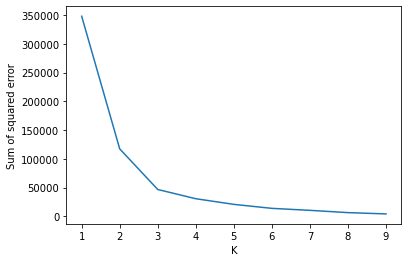

In [20]:
from sklearn.cluster import KMeans
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(dfc[['ORGAN','CANCER']])
    sse.append(km.inertia_)
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [21]:
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(dfc[['ORGAN','CANCER']])
y_predicted

array([0, 2, 2, ..., 0, 0, 0])

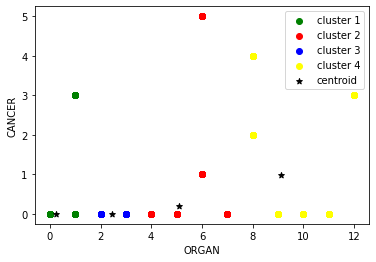

In [22]:
dfc['cluster']=y_predicted
dfc.head()
km.cluster_centers_
df1 = dfc[dfc.cluster==0]
df2 = dfc[dfc.cluster==1]
df3 = dfc[dfc.cluster==2]
df4 = dfc[dfc.cluster==3]
plt.scatter(df1['ORGAN'],df1['CANCER'],color='green',label='cluster 1')
plt.scatter(df2['ORGAN'],df2['CANCER'],color='red',label='cluster 2')
plt.scatter(df3['ORGAN'],df3['CANCER'],color='blue',label='cluster 3')
plt.scatter(df4['ORGAN'],df4['CANCER'],color='yellow',label='cluster 4')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*',label='centroid')
plt.legend()
plt.xlabel('ORGAN')
plt.ylabel('CANCER')
plt.show()

In [23]:
dgv=pd.read_csv("DGV.csv")

In [24]:
dgv.head()

,CNO,START,END,CNV_TYPE,ACTION,VARIANT_TYPE,METHOD,OGAIN,OLOSS,GENOMIC_VARIANT
0,1,1,117193,CNV,Gain+Loss,Oligo_aCGH,Agilent-015685 + 015686 Custom Human 244K CGH ...,29.0,1.0,"FAM138A,FAM138F,LOC100288778,OR4F5,WASH7P"
1,1,51,27650,CNV,Loss,Sequencing,NaN,0.0,2.0,"FAM138A,FAM138F,LOC100288778,WASH7P"
2,1,377,167280,CNV,Complex,"BAC_aCGH,MassSpec,PCR,qPCR,SNP_array",NaN,0.0,0.0,"FAM138A,FAM138F,LOC100288778,LOC729737,OR4F5,W..."
3,1,377,167280,CNV,Gain,"BAC_aCGH,FISH,PCR",Sanger H. sapiens Whole Genome Tile Path 28.7k v3,1.0,0.0,"FAM138A,FAM138F,LOC100288778,LOC729737,OR4F5,W..."
4,1,377,1008567,CNV,Complex,"BAC_aCGH,MassSpec,PCR,qPCR,SNP_array",NaN,0.0,0.0,"AGRN,C1orf159,C1orf170,FAM138A,FAM138F,FAM41C,..."


In [25]:
dgv['CNV_TYPE'].value_counts()

CNV      256263
OTHER      1736
Name: CNV_TYPE, dtype: int64

In [26]:
dgvc=dgv.copy()
dgvc['CNV_TYPE']=dgvc['CNV_TYPE'].map({'CNV':0,'OTHER':1})
dgvc.head()

,CNO,START,END,CNV_TYPE,ACTION,VARIANT_TYPE,METHOD,OGAIN,OLOSS,GENOMIC_VARIANT
0,1,1,117193,0,Gain+Loss,Oligo_aCGH,Agilent-015685 + 015686 Custom Human 244K CGH ...,29.0,1.0,"FAM138A,FAM138F,LOC100288778,OR4F5,WASH7P"
1,1,51,27650,0,Loss,Sequencing,NaN,0.0,2.0,"FAM138A,FAM138F,LOC100288778,WASH7P"
2,1,377,167280,0,Complex,"BAC_aCGH,MassSpec,PCR,qPCR,SNP_array",NaN,0.0,0.0,"FAM138A,FAM138F,LOC100288778,LOC729737,OR4F5,W..."
3,1,377,167280,0,Gain,"BAC_aCGH,FISH,PCR",Sanger H. sapiens Whole Genome Tile Path 28.7k v3,1.0,0.0,"FAM138A,FAM138F,LOC100288778,LOC729737,OR4F5,W..."
4,1,377,1008567,0,Complex,"BAC_aCGH,MassSpec,PCR,qPCR,SNP_array",NaN,0.0,0.0,"AGRN,C1orf159,C1orf170,FAM138A,FAM138F,FAM41C,..."


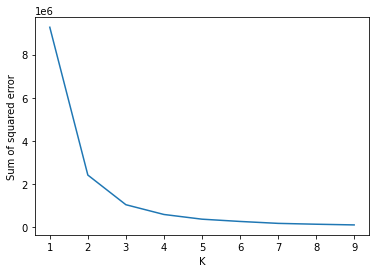

In [27]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(dgvc[['CNO','CNV_TYPE']])
    sse.append(km.inertia_)
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [28]:
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(dgvc[['CNO','CNV_TYPE']])
y_predicted
dgvc['cluster']=y_predicted
dgvc.head()

,CNO,START,END,CNV_TYPE,ACTION,VARIANT_TYPE,METHOD,OGAIN,OLOSS,GENOMIC_VARIANT,cluster
0,1,1,117193,0,Gain+Loss,Oligo_aCGH,Agilent-015685 + 015686 Custom Human 244K CGH ...,29.0,1.0,"FAM138A,FAM138F,LOC100288778,OR4F5,WASH7P",2
1,1,51,27650,0,Loss,Sequencing,NaN,0.0,2.0,"FAM138A,FAM138F,LOC100288778,WASH7P",2
2,1,377,167280,0,Complex,"BAC_aCGH,MassSpec,PCR,qPCR,SNP_array",NaN,0.0,0.0,"FAM138A,FAM138F,LOC100288778,LOC729737,OR4F5,W...",2
3,1,377,167280,0,Gain,"BAC_aCGH,FISH,PCR",Sanger H. sapiens Whole Genome Tile Path 28.7k v3,1.0,0.0,"FAM138A,FAM138F,LOC100288778,LOC729737,OR4F5,W...",2
4,1,377,1008567,0,Complex,"BAC_aCGH,MassSpec,PCR,qPCR,SNP_array",NaN,0.0,0.0,"AGRN,C1orf159,C1orf170,FAM138A,FAM138F,FAM41C,...",2


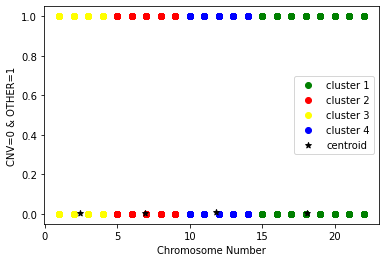

In [29]:
km.cluster_centers_
df1 = dgvc[dgvc.cluster==0]
df2 = dgvc[dgvc.cluster==1]
df3 = dgvc[dgvc.cluster==2]
df4 = dgvc[dgvc.cluster==3]
plt.scatter(df1['CNO'],df1['CNV_TYPE'],color='green',label='cluster 1')
plt.scatter(df2['CNO'],df2['CNV_TYPE'],color='red',label='cluster 2')
plt.scatter(df3['CNO'],df3['CNV_TYPE'],color='yellow',label='cluster 3')
plt.scatter(df4['CNO'],df4['CNV_TYPE'],color='blue',label='cluster 4')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*',label='centroid')
plt.legend()
plt.xlabel('Chromosome Number')
plt.ylabel('CNV=0 & OTHER=1')
plt.show()

In [30]:
df=pd.read_csv("CNVDOK.csv")

In [31]:
df

,CNO,START,END,CYTOBAND,ACTION,GYSM,CANCER
0,1,1,116958895,1pter-p13.1b,Loss,-,Wilms tumour
1,1,1,117007859,1pter-p13.1b,Loss,-,Wilms tumour
2,1,1,117600000,1p13,Copy number,-,Coronary Disease
3,1,1,117600000,1p13,Copy number,ALX3,Prostate cancer
4,1,1,117600000,1p13,Copy number,SORT1,Prostate cancer
...,...,...,...,...,...,...,...
52733,22,22706138,22714284,22q11.23,Copy number,GSTT1,Normal
52734,22,27413730,27467822,22q11|22q12.1,Deletion,CHEK2,Breast cancer
52735,22,38045002,38045064,22q13,Gain or loss,SNORD43,Breast cancer
52736,22,40271293,40272112,22q13.1,Amplification,UQCRFSL1,Cancer


In [38]:
col = 'ACTION'  # 'bar'
n = 200        # 2

df=df[df.groupby(col)[col].transform('count').ge(n)]
df['ACTION'] = df['ACTION'].replace(['                    Gain or loss'],'Gain or loss')
df['ACTION'] = df['ACTION'].replace(['                    Copy number'],'Copy number')
df['ACTION'] = df['ACTION'].replace(['                    Deletion'],'Deletion')
df['ACTION'] = df['ACTION'].replace(['                    Gain'],'Gain')
df['ACTION'] = df['ACTION'].replace(['                    Loss'],'Loss')
df['ACTION'] = df['ACTION'].replace(['                    Gain and loss'],'Gain and loss')
df['ACTION'] = df['ACTION'].replace(['Insertion or deletio                    n'],'Insertion or deletion')
df['ACTION'] = df['ACTION'].replace(['                    Amplification'],'Amplification')
df['ACTION'] = df['ACTION'].replace(['                    Insertion or deletion'],'Insertion or deletion')
df['ACTION'] = df['ACTION'].replace(['                    LOH'],'LOH')
df['ACTION'] = df['ACTION'].replace(['                    Duplication'],'Duplication')
df['ACTION'] = df['ACTION'].replace(['                    Insertion'],'Insertion')
df['ACTION'].value_counts()

Gain or loss             11043
Deletion                  6564
Insertion                 5736
Copy number               4293
Gain                      4267
Gain and loss             3994
Loss                      3830
Amplification             2999
Insertion or deletion     2057
LOH                       1176
Duplication                481
Name: ACTION, dtype: int64

In [39]:
df

,CNO,START,END,CYTOBAND,ACTION,GYSM,CANCER
3,1,1,117600000,1p13,Copy number,ALX3,Prostate cancer
4,1,1,117600000,1p13,Copy number,SORT1,Prostate cancer
5,1,1,117600000,1p13,Gain,-,Glioblastoma multiforme
6,1,1,117600000,1p13-1p22,Loss,-,Acute lymphoblastic leukemia
11,1,1,124300000,1p,Deletion,-,Cancer
...,...,...,...,...,...,...,...
52733,22,22706138,22714284,22q11.23,Copy number,GSTT1,Normal
52734,22,27413730,27467822,22q11|22q12.1,Deletion,CHEK2,Breast cancer
52735,22,38045002,38045064,22q13,Gain or loss,SNORD43,Breast cancer
52736,22,40271293,40272112,22q13.1,Amplification,UQCRFSL1,Cancer


In [40]:
col = 'CANCER'  # 'bar'
n = 200        # 2

df=df[df.groupby(col)[col].transform('count').ge(n)]
df['CANCER'].value_counts()

Breast cancer                               13842
Non-syndromic sensorineural hearing loss    11416
Normal                                       5545
Pancreatic cancer                            4002
Ovarian cancer                               2903
Cancer                                       2500
early-passage human iPS cells                1211
Acute lymphoblastic leukemia                  914
Lung cancer                                   613
Prostate cancer                               607
Chronic lymphocytic leukemia                  506
Melanoma                                      419
Autism                                        384
Pancreas cancer                               372
Schizophrenia                                 299
Osteosarcoma                                  265
Glioma                                        218
Ependymoma                                    214
Glioblastoma multiforme                       210
Name: CANCER, dtype: int64

In [41]:
dfc=df.copy()
dfc['CANCER']=dfc['CANCER'].map({'Breast cancer':0,'Non-syndromic sensorineural hearing loss':1,'Normal':2,'Pancreatic cancer':3,'Ovarian cancer':4,'Cancer':5,'early-passage human iPS cells':6,'Acute lymphoblastic leukemia':7,'Lung cancer':8,'Prostate cancer':9,'Chronic lymphocytic leukemia':10,'Melanoma':11,'Autism':12,'Pancreas cancer':13,'Schizophrenia':14,'Osteosarcoma':15,'Glioma':16,'Ependymoma':17,'Glioblastoma multiforme':18})
dfc['ACTION']=dfc['ACTION'].map({'Gain or loss':0,'Deletion':1,'Insertion':2,'Gain':3,'Copy number':4,'Loss':5,'Gain and loss':6,'Amplification':7,'Insertion or deletion':8,'LOH':9,'Duplication':10})

In [42]:
dfc

,CNO,START,END,CYTOBAND,ACTION,GYSM,CANCER
3,1,1,117600000,1p13,4,ALX3,9
4,1,1,117600000,1p13,4,SORT1,9
5,1,1,117600000,1p13,3,-,18
6,1,1,117600000,1p13-1p22,5,-,7
11,1,1,124300000,1p,1,-,5
...,...,...,...,...,...,...,...
52733,22,22706138,22714284,22q11.23,4,GSTT1,2
52734,22,27413730,27467822,22q11|22q12.1,1,CHEK2,0
52735,22,38045002,38045064,22q13,0,SNORD43,0
52736,22,40271293,40272112,22q13.1,7,UQCRFSL1,5


In [43]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

#split dataset in features and target variable
feature_cols = ['CNO', 'START', 'END','ACTION']
X = dfc[feature_cols] # Features
y = dfc['CANCER'] # Target variable
    
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 80% training and 20% test
    
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
    
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

print("!!Enter Values to determine cancer type !!")
a=int(input("Enter Chromosome Number"))
b=int(input("Enter Start Coordinate: "))
c=int(input("Enter End Coordinate: "))
print("\n\nFor Gain or loss enter 0\nFor Deletion enter 1\nFor Insertion enter 2\nFor Gain enter 3\nFor Copy number enter 4\nFor Loss enter 5")
print("For Gain and Loss enter 6\nFor Amplification enter 7\nFor insertion or Deletion enter 8\nFor LOH enter 9\nFor Duplication enter 10")
d=int(input("Enter ACTION: "))
q=clf.predict([[a,b,c,d]])
print(q)
if q==0:
    print('Cancer Type is Breast cancer!!')
elif q==1:
    print('Cancer Type is Non-syndromic sensorineural hearing loss!!')
elif q==2:
    print('Cancer Type is Normal!!')
elif q==3:
    print('Cancer Type is Pancreatic cancer!!')
elif q==4:
    print('Cancer Type is Ovarian cancer!!')
elif q==5:
    print('Cancer Type is Cancer!!')
elif q==6:
    print('Cancer Type is early-passage human iPS cells!!')
elif q==7:
    print('Cancer Type is Acute lymphoblastic leukemia!!')
elif q==8:
    print('Cancer Type is Lung cancer!!')
elif q==9:
    print('Cancer Type is Prostate cancer!!')
elif q==10:
    print('Cancer Type is Chronic lymphocytic leukemia!!')
elif q==11:
    print('Cancer Type is Melanoma!!')
elif q==12:
    print('Cancer Type is Autism!!')
elif q==13:
    print('Cancer Type is Pancreas cancer!!')
elif q==14:
    print('Cancer Type is Schizophrenia!!')
elif q==15:
    print('Cancer Type is Osteosarcoma!!')
elif q==16:
    print('Cancer Type is Glioma!!')
elif q==17:
    print('Cancer Type is Ependymoma!!')
elif q==18:
    print('Cancer Type is Glioblastoma multiforme!!')
else:
    print('Cancer Type is Unable to predict!!')

Accuracy: 83.1287683031869
!!Enter Values to determine cancer type !!
Enter Chromosome Number1
Enter Start Coordinate: 0
Enter End Coordinate: 0000


For Gain or loss enter 0
For Deletion enter 1
For Insertion enter 2
For Gain enter 3
For Copy number enter 4
For Loss enter 5
For Gain and Loss enter 6
For Amplification enter 7
For insertion or Deletion enter 8
For LOH enter 9
For Duplication enter 10
Enter ACTION: 0
[0]
Cancer Type is Breast cancer!!
